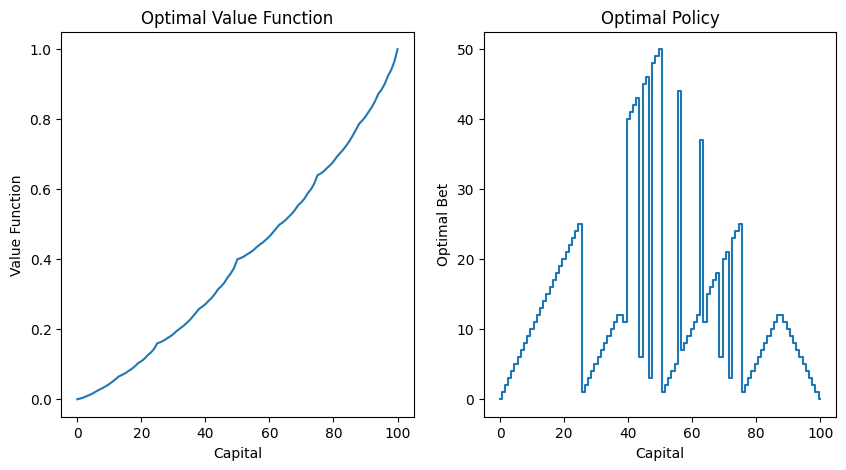

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
p_h = 0.4  # Probability of winning
goal = 100  # Target capital
theta = 1e-9  # Convergence threshold

# Initialize value function
V = np.zeros(goal + 1)
V[goal] = 1  # Terminal state

policy = np.zeros(goal + 1)

while True:
    delta = 0
    for s in range(1, goal):
        actions = np.arange(1, min(s, goal - s) + 1)
        action_returns = [p_h * V[s + a] + (1 - p_h) * V[s - a] for a in actions]
        new_value = max(action_returns)
        delta = max(delta, abs(V[s] - new_value))
        V[s] = new_value
    if delta < theta:
        break

# Extract policy
for s in range(1, goal):
    actions = np.arange(1, min(s, goal - s) + 1)
    action_returns = [p_h * V[s + a] + (1 - p_h) * V[s - a] for a in actions]
    policy[s] = actions[np.argmax(action_returns)]

# Plot results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(V)
plt.xlabel("Capital")
plt.ylabel("Value Function")
plt.title("Optimal Value Function")

plt.subplot(1, 2, 2)
plt.step(range(goal + 1), policy, where="mid")
plt.xlabel("Capital")
plt.ylabel("Optimal Bet")
plt.title("Optimal Policy")

plt.show()